# Métodos de agrupamiento

En este ejercicio, aplicaremos los conceptos vistos en clase referentes a métodos de agrupamiento no supervisados. Específicamente, explorarás el uso de KMeans y DBScan usando la librería de scikit-learn. Comenzamos importando las librerías.

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import DBSCAN, KMeans
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
random_state = 0 # Fijamos la semilla aleatoria para que siempre den los mismos datos
np.random.seed(random_state)
matplotlib.rc('image', cmap='nipy_spectral')

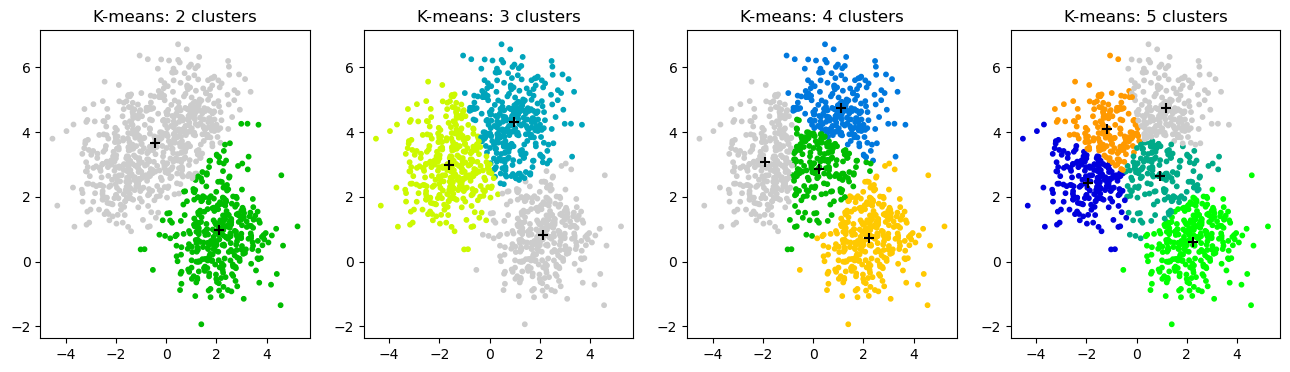

In [2]:
# Number of cluster centers for KMeans and BisectingKMeans
n_clusters_list = [2, 3, 4, 5]

# Generate sample data
n_samples = 1000
X, _ = datasets.make_blobs(n_samples=n_samples, centers=3, random_state=random_state)

# Make subplots for each variant
n_cols = 4
rows = len(n_clusters_list) // n_cols
fig, axes = plt.subplots(rows, n_cols, figsize=(4*n_cols, 4))
axes = axes.flatten()
for ax, n_clusters in zip(axes, n_clusters_list):
    algo = KMeans(n_clusters=n_clusters, random_state=random_state, n_init=3)
    algo.fit(X)
    centers = algo.cluster_centers_

    # TODO: Grafica los datos usando scatter, recuerda que X = (x, y)
    ax.scatter(X[:, 0], X[:, 1], s=10, c=algo.labels_, vmin=-1)

    # Graficamos los centroides
    ax.scatter(centers[:, 0], centers[:, 1], marker="+", s=60, c='k')

    ax.set_title(f"K-means: {n_clusters} clusters")
plt.show()

# Evaluando el desempeño del algoritmo

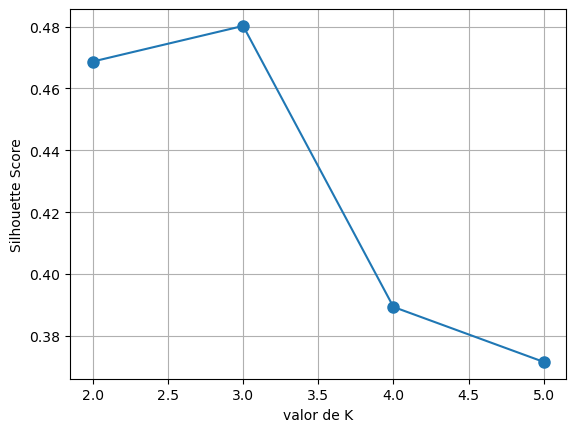

In [3]:
from sklearn.metrics import silhouette_score

Ks = range(2,6)
# Your code below here
scores = []
for k in Ks:
    kmeans = KMeans(n_clusters=k, random_state=0).fit(X)
    scores.append(silhouette_score(X, kmeans.labels_))
plt.plot(Ks,scores,'-o', markersize=8)
plt.xlabel("valor de K")
plt.ylabel("Silhouette Score")
plt.grid()
plt.show()

# Rompiendo las asunciones de K-Means

In [4]:
n_samples=200
# =============================================================================
# Generamos diferentes conjuntos de datos que rompen las asunciones de K-Means
# =============================================================================
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=0.5, noise=0.05)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=0.05)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
# Anisotropicly distributed data
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)
# Blobs con varianzas variadas
varied = datasets.make_blobs(
    n_samples=n_samples, cluster_std=[1.0, 2.5, 0.5], random_state=random_state
)

# Cada dataset es un tuple (datos, etiquetas)
datasets = {"Círculos": noisy_circles,
            "Lunas": noisy_moons, 
            "Blobs": blobs, 
            "Varianzas diferentes": varied,
            # "Aleatorio": no_structure,
            "Datos anisotrópicos": aniso}

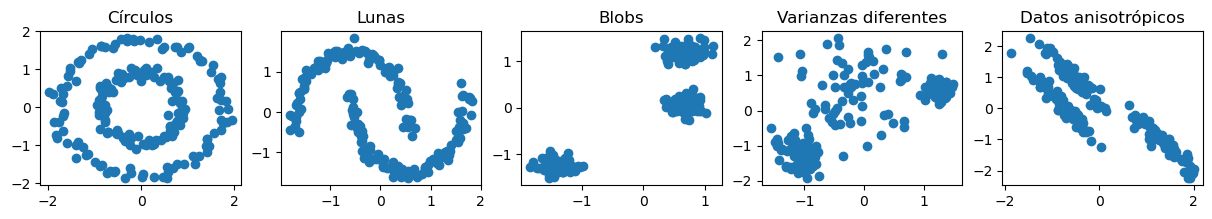

In [5]:
# ============
# Graficamos los datos
# ============
n_rows = 1
n_cols = len(datasets)
fig, axs = plt.subplots(n_rows, n_cols, figsize=(3*n_cols, 2))
axs = axs.flatten()
for (name, data), ax in zip(datasets.items(), axs):
    X, _ = data
    # Normalizamos los datos para que todos estén en la misma escala
    X = StandardScaler().fit_transform(X)
    ax.scatter(X[:,0], X[:,1])
    ax.set_title(name)

Aplica K-means a cada uno de los datasets anteriores. Ajusta los hiperparámetros según consideres para encontrar la mejor separación.

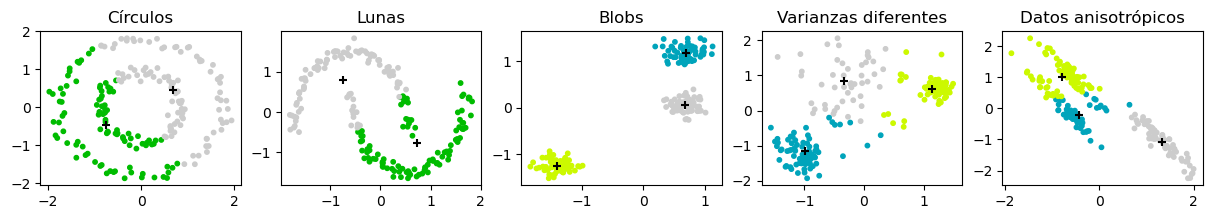

In [6]:
n_rows = 1
n_cols = len(datasets)
fig, axs = plt.subplots(n_rows, n_cols, figsize=(3*n_cols, 2))
axs = axs.flatten()
# TODO: Modifica la cantidad de clusters para cada dataset hasta que encuentres un resultado que te satisfaga
n_clusters = {"Ciculos": 1,
              "Lunas": 1,
              "Blobs": 1,
              "Varianzas": 1,
              "Anisotrópicos": 1}
for (name, data), n, ax in zip(datasets.items(), n_clusters.values(), axs):
    X, _ = data
    X = StandardScaler().fit_transform(X)
    ax.set_title(name)

    # Aplica K-means
    kmeans = KMeans(n_clusters=n, random_state=random_state, n_init=3)
    kmeans.fit(X)
    centers = kmeans.cluster_centers_
    ax.scatter(X[:, 0], X[:, 1], s=10, c=kmeans.labels_, vmin=-1)
    ax.scatter(centers[:, 0], centers[:, 1], marker="+", s=30, c='k')

# DBScan
Aplica DBScan a cada uno de los datasets anteriores. Ajusta los hiperparámetros según consideres para encontrar la mejor separación.

Clusteres en Círculos [0 1]
Clusteres en Lunas [0 1]
Clusteres en Blobs [0 1 2]
Clusteres en Varianzas diferentes [-1  0  1  2  3  4]
Clusteres en Datos anisotrópicos [-1  0  1  2]


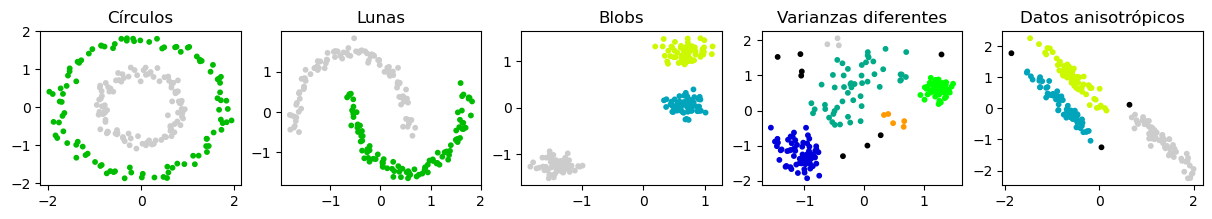

In [7]:
n_rows = 1
n_cols = len(datasets)
fig, axs = plt.subplots(n_rows, n_cols, figsize=(3*n_cols, 2))
axs = axs.flatten()
# TODO: Modifica los hiper parámetros de dbscan hasta encontrar un resultado que te satisfaga
params = {"Ciculos": {"eps": 0.2, "min_samples": 2},
          "Lunas": {"eps": 0.2, "min_samples": 2},
          "Blobs": {"eps": 0.2, "min_samples": 2},
          "Varianzas": {"eps": 0.2, "min_samples": 2},
          "Anisotrópicos": {"eps": 0.2, "min_samples": 2}}
for i, ((name, data), ax) in enumerate(zip(datasets.items(), axs)):
    X, _ = data
    X = StandardScaler().fit_transform(X)
    ax.set_title(name)
    eps = params[i]['eps']
    min_samples = params[i]['min_samples']
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    dbscan.fit(X)
    print(f"Clusteres en {name}", np.unique(dbscan.labels_))
    ax.scatter(X[:, 0], X[:, 1], s=10, c=dbscan.labels_, vmin=-1)